In [ ]:
#https://towardsdatascience.com/auto-encoder-what-is-it-and-what-is-it-used-for-part-1-3e5c6f017726

In [ ]:
#Requirements
#Load any image from MNIST dataset as img.png

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras import optimizers
from keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = mnist.load_data()
train_x = x_train.reshape(60000, 784) / 255
val_x = x_test.reshape(10000, 784) / 255

autoencoder = Sequential()
autoencoder.add(Dense(512,  activation='elu', input_shape=(784,)))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(10,    activation='linear', name="bottleneck"))
autoencoder.add(Dense(128,  activation='elu'))
autoencoder.add(Dense(512,  activation='elu'))
autoencoder.add(Dense(784,  activation='sigmoid'))
autoencoder.compile(loss='mean_squared_error', optimizer = Adam())
trained_model = autoencoder.fit(train_x, train_x, batch_size=1024, epochs=10, verbose=1, validation_data=(val_x, val_x))
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
encoded_data = encoder.predict(train_x)  # bottleneck representation
decoded_output = autoencoder.predict(train_x)        # reconstruction
encoding_dim = 10

# return the decoder
encoded_input = Input(shape=(encoding_dim,))
decoder = autoencoder.layers[-3](encoded_input)
decoder = autoencoder.layers[-2](decoder)
decoder = autoencoder.layers[-1](decoder)
decoder = Model(encoded_input, decoder)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
59/59 [==============================] - 13s 169ms/step - loss: 0.0773 - val_loss: 0.0502
Epoch 2/10
59/59 [==============================] - 10s 178ms/step - loss: 0.0435 - val_loss: 0.0374
Epoch 3/10
59/59 [==============================] - 6s 103ms/step - loss: 0.0348 - val_loss: 0.0311
Epoch 4/10
59/59 [==============================] - 8s 138ms/step - loss: 0.0298 - val_loss: 0.0275
Epoch 5/10
59/59 [==============================] - 11s 184ms/step - loss: 0.0266 - val_loss: 0.0248
Epoch 6/10
59/59 [==============================] - 7s 112ms/step - loss: 0.0243 - val_loss: 0.0229
Epoch 7/10
59/59 [==============================] - 8s 139ms/step - loss: 0.0227 - val_loss: 0.0216
Epoch 8/10
59/59 [==============================] - 6s 105ms/step - loss: 0.0215 - val_loss: 0.0206
Epoch 9/10
59/59 [==============================] - 8s 131ms/step - loss: 0.0206 - val_loss: 0.0198
Epoch 10/10
1875/1875 [=========

In [3]:
%matplotlib inline
from keras.preprocessing import image
# if the img.png is not one of the MNIST dataset that the model was trained on, the error will be very high.
img = image.load_img("./img.png", target_size=(28, 28), color_mode = "grayscale")
input_img = image.img_to_array(img)
inputs = input_img.reshape(1,784)
target_data = autoencoder.predict(inputs)
dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

1/1 [==============================] - 0s 81ms/step
[1950.0643]


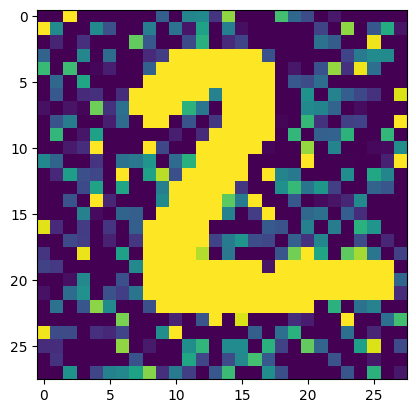

In [5]:
# The code below is from the Keras Blogs
# https://blog.keras.io/building-autoencoders-in-keras.html
import matplotlib.pyplot as plt


noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Print one image to see the noise
plt.imshow(x_test_noisy[1].reshape(28, 28))